# Emergency 911 Calls - Explporatory Data Analysis

**Introduction**
---

Mongomery County
---

Montgomery county,locally also referred to as Montco, southeastern Pennsylvania, U.S., consisting of a gently hilly piedmont region located northwest of Philadelphia and bounded to the southwest by the Schuylkill River. 

As of the 2010 census, the population was 799,874, making it the third-most populous county in Pennsylvania, after Philadelphia and Allegheny Counties. The county seat is Norristown. Montgomery County is very diverse, ranging from farms and open land in Upper Hanover to densely populated rowhouse streets in Cheltenham.


911 
---

911 is an emergency telephone number for the North American Numbering Plan (NANP). Analysing emergency calls dataset and discovering hidden trends and patterns will help in ensuring that the emergency response team is better equipped to deal with emergencies.

Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce

Considering road accidents, fire accidents etc, high numbers in specific areas indicate that there is a high demand for ambulance services in those areas. Road accidents in some areas might be due to road conditions which need to be improved. High frequency of emergencies due to respiratory problems might be due to harmful pollutants in the air in that specific area. Association rule mining will thus help in discovering such patterns.


The dataset contains Emergency 911 calls in Montgomery County located in the Commonwealth of Pennsylvania. The attributes chosen include: type of emergency, time stamp, township where the emergency has occurred.

Objective
---

One of the objectives of this notebook is to show step-by-step how to analyze and visualize the dataset to better understand 911 calls and what originates them. Moreover, we are going to explain most of the concepts used so that you understand why we are using them

## 🔴Import Libraries 📦

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
%matplotlib inline

Loading Data
---

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## **Data Questions and Cleaning**

In [5]:
df.shape

(663522, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB



Data has float, integer, and object type values.

Data type of timeStamp is object that need to conver to datetime

Feature Columns
---

lat : String variable, Latitude

lng: String variable, Longitude

desc: String variable, Description of the Emergency Call

zip: String variable, Zipcode

title: String variable, Title

timeStamp: String variable, YYYY-MM-DD HH:MM:SS

twp: String variable, Township

addr: String variable, Address

e: String variable, Dummy variable (always 1)

In [7]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Insights on each column or attribute of the data**

the desc column contains information on the address , township and station which are seperated by semi colons
give a combined and condensed information on the location and the staion to enable responders act fast.

the lat and lng also provides a geographical location where the call is comming from.

zip is the postal code.

title can also be referred to as the nature or reason behind the call and it can be an emergency, fire etc.

timeStamp shows the date and time the call was made.

column 'e' is a dummy variable, whoes value is always 1. So lets drop it as it will not providing us any useful information.|

In [9]:
df.drop('e' ,axis=1 , inplace=True)

**Convert timestamp from string to datetime**

In [10]:
type(df['timeStamp'].iloc[1])

str

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
type(df['timeStamp'].iloc[1])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
datemin = df["timeStamp"].min()
datemin

Timestamp('2015-12-10 14:39:21')

In [14]:
datemax = df['timeStamp'].max()
datemax

Timestamp('2020-07-29 15:54:08')

**What is the timespan of the Dataset?**

In [15]:
from dateutil import relativedelta

dil = relativedelta.relativedelta(pd.to_datetime(datemax), pd.to_datetime(datemin))
print("{} years and {} months".format(dil.years, dil.months))

4 years and 7 months


So in a 4 years and 7 months of time span from Dec 2015 to July 2020, about 663 hundred people called emergency number 911 to get help in Montgomery County, PA.

**Lets breakdown the timeStamp attribute into seperate columns**

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['DayofWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Year'] = df['timeStamp'].apply(lambda time: time.year)
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [17]:
df['DayofWeek'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DayofWeek'] = df['DayofWeek'].map(dmap)
df['DayofWeek'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

**Which features contain blank, null or empty values?**

In [19]:
null = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count()) * 100).sort_values(ascending=False)
missing_val = pd.concat([null, percent], axis=1, keys=['total', 'percent'])
missing_val

,total,percent
zip,80199,12.086864
twp,293,0.044158
lat,0,0.000000
lng,0,0.000000
desc,0,0.000000
title,0,0.000000
timeStamp,0,0.000000
addr,0,0.000000
Hour,0,0.000000
DayofWeek,0,0.000000


Zip has 80199 missing values which is about 12% of total missing values.

Township has 293 missing values which is only 0.04% of total missing values


Except Zip and Township, no other field have any missing values.

**Lets breakdown the desc; ' Description of the Emergency Call' attribute into seperate columns**

In [20]:
pd.set_option('display.max_colwidth', 1)
df['desc'].head()

0    REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;          
1    BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;
2    HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;                         
3    AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;              
4    CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; Station 329; 2015-12-10 @ 16:56:52;   
Name: desc, dtype: object

**Since station is the only unique information present in the desc attribute that is not its own attribute we extract it from it**

In [21]:
df['station_code'] = df['desc'].str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
df['station_code'] =  df['station_code'].str.replace(':','')
df['station_code'] = df['station_code'].str.strip()
df['station_code']

0         332  
1         345  
2         STA27
3         308A 
4         329  
         ...   
663517    None 
663518    322A 
663519    313  
663520    STA27
663521    None 
Name: station_code, Length: 663522, dtype: object

**In the title attribute there are two classes of information which is the reason category(e.g EMS, Fire etc) and reason**

**each class should be seperated into specific columns**

In [22]:
df['reason_cat'] = df['title'].apply(lambda x: x.split(':')[0])
df['reason'] = df['title'].apply(lambda x: x.split(':')[1])

In [23]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,DayofWeek,Month,Year,Date,station_code,reason_cat,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,17,Thu,12,2015,2015-12-10,332,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,Thu,12,2015,2015-12-10,345,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,14,Thu,12,2015,2015-12-10,STA27,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,16,Thu,12,2015,2015-12-10,308A,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; Station 329; 2015-12-10 @ 16:56:52;,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,16,Thu,12,2015,2015-12-10,329,EMS,DIZZINESS


Exploratory Data Analysis (EDA)
---

We do the Exploratory Data Analysis (EDA) of 911 data set to summarize their main characteristics with the help of summary statistics and graphical representations.. This EDA method will help us to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.

**What are the top 5 zipcodes for 911 calls?**

In [24]:
zip = pd.DataFrame(df['zip'].value_counts().head(5))
zip.rename(columns = {'zip':'Top 5'}, inplace = True)
zip.style.background_gradient(cmap='Blues')

,count
zip,
19401.000000,45606
19464.000000,43910
19403.000000,34888
19446.000000,32270
19406.000000,22464


**What are the top 5 townships (twp) for 911 calls?**

In [25]:
twp = pd.DataFrame(df['twp'].value_counts().head(5))
twp.rename(columns={'twp': 'Top 5'}, inplace=True)
twp.style.background_gradient(cmap='Greens')

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


**lets take a look at the township {LOWER MERION} with the most 911 calls and see the reason category and reason for it**

In [26]:
low_mer = pd.DataFrame(df[df['twp'] == 'LOWER MERION']['reason_cat'].value_counts().head())
low_mer.rename(columns={'low_mer': 'Top 5'}, inplace=True)
low_mer.style.background_gradient(cmap='Greens')

,count
reason_cat,
Traffic,23758
EMS,21578
Fire,10154


In [27]:
low_mer = pd.DataFrame(df[df['twp'] == 'LOWER MERION']['reason'].value_counts().head())
low_mer.rename(columns={'low_mer': 'Top 5'}, inplace=True)
low_mer.style.background_gradient(cmap='Greens')

,count
reason,
VEHICLE ACCIDENT -,14613
FIRE ALARM,5105
DISABLED VEHICLE -,5010
VEHICLE ACCIDENT,3365
ROAD OBSTRUCTION -,2838


**This area has a high demand for emergency related to traffic and EMS (Emergency Medical Services). So might be this township require to improve traffic/road conditions and fire response**

**Most called stations for emergency**

In [28]:
station = pd.DataFrame(df['station_code'].value_counts().head(10))
station.rename(columns = {'station_code':'Top 5'}, inplace = True)
station.style.background_gradient(cmap='Blues')

,count
station_code,
308A,25346
329,21895
313,20325
381,15949
345,14504
308,13963
351,12705
345B,12165
317,11802


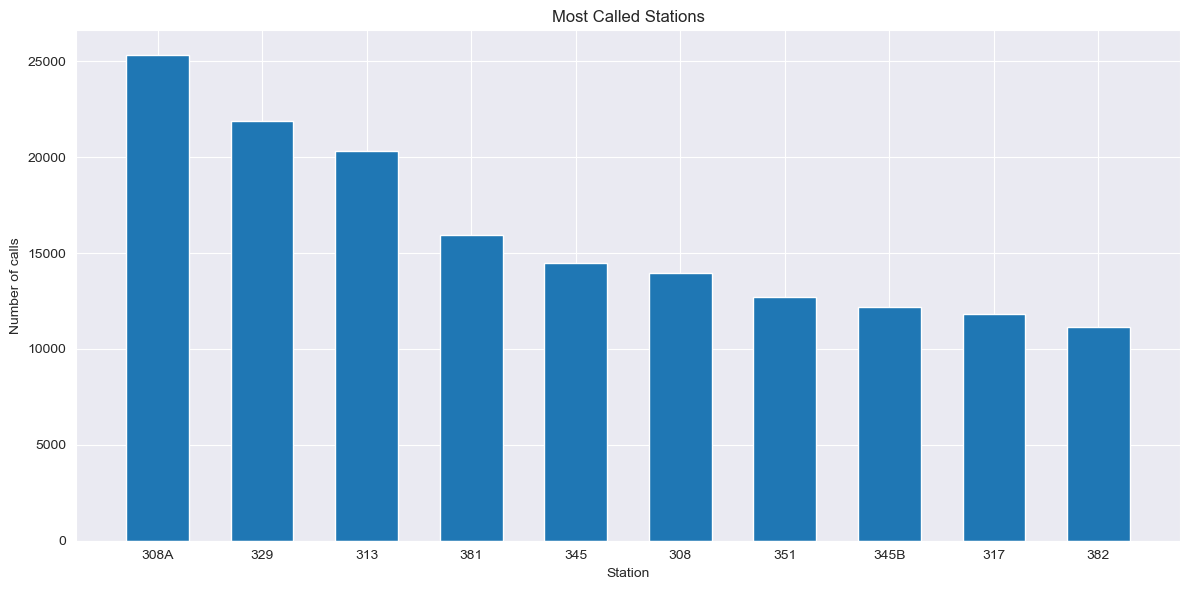

In [29]:
stat = df['station_code'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.bar(stat.index,stat.values,width=0.6)
plt.title("Most Called Stations")
plt.xlabel("Station")
plt.ylabel("Number of calls")
plt.tight_layout()

**What are the top reasons for the emergency calls at station 308A? and what township?**

In [30]:
stre = pd.DataFrame(df[df['station_code'] == '308A']['reason'].value_counts().head(5))
stre.rename(columns = {'reason':'Top 5'}, inplace = True)
stre.style.background_gradient(cmap='Blues')

,count
reason,
RESPIRATORY EMERGENCY,2907
CARDIAC EMERGENCY,2331
SUBJECT IN PAIN,2293
FALL VICTIM,1697
UNKNOWN MEDICAL EMERGENCY,1371


**seems to be mostly medical emergency problems that has been reported to that station**

**Does it have something to do with the location in close proximity to the station or where its centered at?**

In [31]:
df[df['station_code'] == '308A']['twp'].value_counts().head(10)

twp
NORRISTOWN          24718
PLYMOUTH            542  
WEST NORRITON       15   
EAST NORRITON       9    
LOWER MERION        3    
UPPER PROVIDENCE    3    
CHELTENHAM          3    
WHITPAIN            3    
CONSHOHOCKEN        2    
LIMERICK            2    
Name: count, dtype: int64

**NORRISON TOWN must have presnce of some enviromental anomaly or pollution in particular that disturbs its residents
and maybe Norrisontown is near plymouth**

**A google map viusalization for this should show how close both towns are**

In [38]:
import folium
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="geo_project")

# Get coordinates for the two towns
town1_name = "Plymouth, Montgomery County, United States"
town2_name = "Norristown, Montgomery County, United States"

town1 = geolocator.geocode(town1_name)
town2 = geolocator.geocode(town2_name)

# Check if geocoding was successful
if not town1 or not town2:
    print("Could not locate one or both towns. Please check the names or try alternative formats.")
else:
    # Print coordinates (optional, for verification)
    print("Town 1:", town1.latitude, town1.longitude)
    print("Town 2:", town2.latitude, town2.longitude)

    # Create a base map centered between the two towns
    map_center = [(town1.latitude + town2.latitude) / 2, (town1.longitude + town2.longitude) / 2]
    map_ = folium.Map(location=map_center, zoom_start=10)

    # Add markers for the two towns
    folium.Marker([town1.latitude, town1.longitude], popup="Town 1", tooltip=town1.address).add_to(map_)
    folium.Marker([town2.latitude, town2.longitude], popup="Town 2", tooltip=town2.address).add_to(map_)

    # Draw a line between the two towns
    folium.PolyLine([(town1.latitude, town1.longitude), (town2.latitude, town2.longitude)], color="blue").add_to(map_)

    # Display the map
    map_



Town 1: 40.109412750000004 -75.29834666183419
Town 2: 40.1148787 -75.3433705


In [39]:
import folium

# Coordinates for the two towns
town1_coords = [40.109412750000004, -75.29834666183419]
town2_coords = [40.1148787, -75.3433705]

# Create a base map centered between the two towns
map_center = [(town1_coords[0] + town2_coords[0]) / 2, (town1_coords[1] + town2_coords[1]) / 2]
map_ = folium.Map(location=map_center, zoom_start=14)

# Add markers for the two towns
folium.Marker(town1_coords, popup="Town 1: Plymouth", tooltip="Plymouth").add_to(map_)
folium.Marker(town2_coords, popup="Town 2: Norristown", tooltip="Norristown").add_to(map_)

# Draw a line between the two towns
folium.PolyLine([town1_coords, town2_coords], color="blue", weight=2.5).add_to(map_)

# Display the map
map_


**Since we know both towns are pretty close lets be sure and see what are the most common reasons for emergency in norrisontown
and plymouth**

In [40]:
df[df['twp'] == 'NORRISTOWN']['reason'].value_counts().head(10)

reason
VEHICLE ACCIDENT -           5912
RESPIRATORY EMERGENCY        2838
CARDIAC EMERGENCY            2288
SUBJECT IN PAIN              2240
FIRE ALARM                   1774
FALL VICTIM                  1656
VEHICLE ACCIDENT             1410
UNKNOWN MEDICAL EMERGENCY    1336
SEIZURES                     1043
ABDOMINAL PAINS              1012
Name: count, dtype: int64

In [41]:
df[df['twp'] == 'NORRISTOWN']['reason_cat'].value_counts().head(10)

reason_cat
EMS        24774
Traffic    7611 
Fire       5248 
Name: count, dtype: int64

**Due to several investigations from news sources and news articles Norrisontown has experienced a lot of fire outbreak in recent years,
be it from wild fire spread or from human activity in domestic appartments.
This could be a major contributor to the amount of emergency and fire reason category which can either be a fire alram or respiratory emergency**

**The weather in norrisontown can be extrerme as well leading to a code Blue or Red, making residents seek emergency centers to
cool off**

In [42]:
from IPython.display import Markdown

quote = """
### Heatwave in Norristown

Montgomery County officials issued a Code Red weather emergency due to an oppressive air mass, with a heat index reaching over 100 degrees. As reported by *The New York Times*:

> "Pretty hot. They say it’s about 90 or something, but it feels like 102."  
> *(Source: [Fox News 29](https://www.fox29.com/news/keeping-cool-heat-norristown-center-opens-doors-help-vulnerable))*

This demonstrates the extreme weather conditions faced by residents and their efforts to stay cool.
"""

display(Markdown(quote))


### Heatwave in Norristown

Montgomery County officials issued a Code Red weather emergency due to an oppressive air mass, with a heat index reaching over 100 degrees. As reported by *The New York Times*:

> "Pretty hot. They say it’s about 90 or something, but it feels like 102."  
> *(Source: [Fox News 29](https://www.fox29.com/news/keeping-cool-heat-norristown-center-opens-doors-help-vulnerable))*

This demonstrates the extreme weather conditions faced by residents and their efforts to stay cool.


In [43]:
df[df['twp'] == 'PLYMOUTH']['reason_cat'].value_counts()

reason_cat
Traffic    9319
EMS        8269
Fire       2528
Name: count, dtype: int64

In [44]:
df[df['twp'] == 'PLYMOUTH']['reason'].value_counts().head(10)

reason
VEHICLE ACCIDENT -       5962
DISABLED VEHICLE -       2270
VEHICLE ACCIDENT         1181
RESPIRATORY EMERGENCY    984 
FIRE ALARM               968 
CARDIAC EMERGENCY        810 
ROAD OBSTRUCTION -       758 
FALL VICTIM              743 
SUBJECT IN PAIN          453 
HEAD INJURY              364 
Name: count, dtype: int64

**Both NorrisonTown and Plymouth have Traffic and Vechicle accidents as their most common reasons for 911 calls 
which could also be a contributing factor to the medical emergency and cardiac emergency as well.**

**The harsh weather conditions might also be a factor for the road accidents**

**majority of emergency calls in both areas are related to vehical accidents only. So this area needs to improve in this field to avoid such cases, like reckless driving, driving in bad weather conditions, not stopping while the red light is running etc.**

**Top 10 dates of receiving the maximum in calls in all the years:**

In [45]:
date =pd.DataFrame(df['Date'].value_counts().head(10))
date.style.background_gradient(cmap='Blues')

,count
Date,
2018-03-02,2187
2018-11-15,1662
2020-06-03,1401
2018-03-07,920
2018-03-03,917
2016-01-23,887
2019-11-01,877
2019-07-11,769
2020-01-18,706


**Most busy year with total number of calls recieved:**

In [46]:
df['Year'].value_counts().head(1)

Year
2018    151527
Name: count, dtype: int64

**Most common Reason for a 911 call**

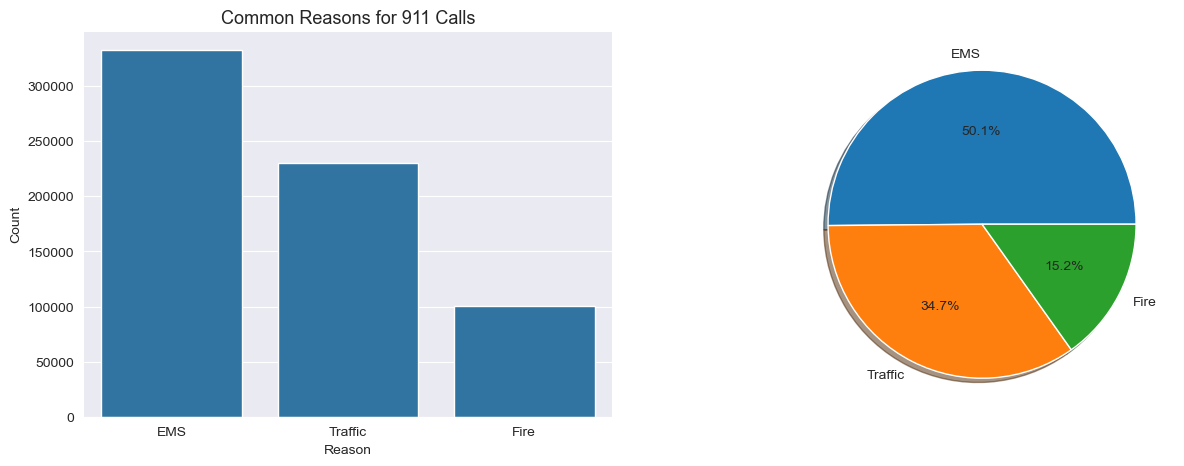

In [47]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

sns.countplot(x='reason_cat', data=df, order=df['reason_cat'].value_counts().index, ax=axes[0])
axes[0].set_title('Common Reasons for 911 Calls', size=13)
axes[0].set(xlabel='Reason', ylabel='Count')

df['reason_cat'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[1],shadow=True)
axes[1].set(xlabel='', ylabel='')

sns.despine(bottom=False, left=True)

**People called more for medical emergency service rather than others.**

C:\Users\user\AppData\Local\Temp\ipykernel_2644\184045312.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette='prism')


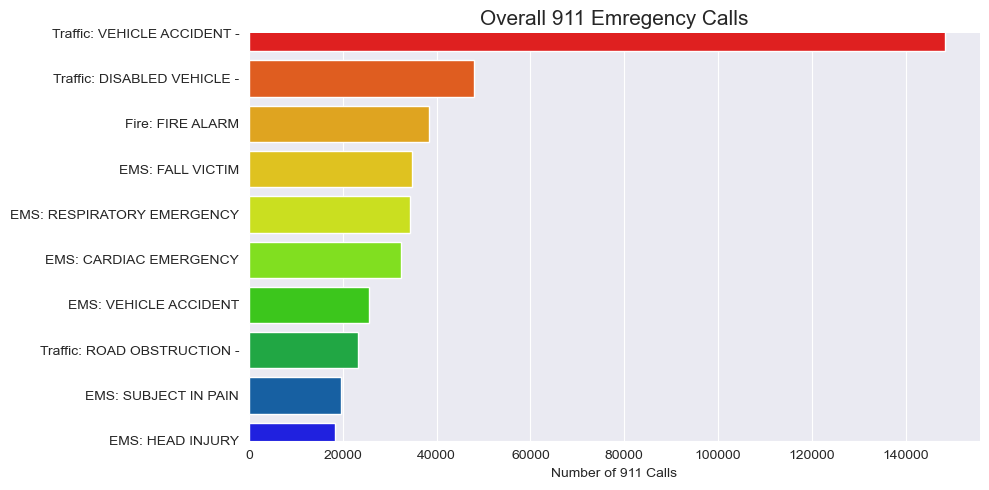

In [48]:
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette='prism')
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Overall 911 Emregency Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()

**The barcahrt shows the top 10 emergency calls from all the categories.**

**Vehicle accidents are the number one reason people call 911.
Disabled vehicle and fire alarm are in second and third place**

In [49]:
df[df['reason_cat']=='Traffic'].groupby('reason').count()['lat'].sort_values(ascending=True)

reason
DEBRIS/FLUIDS ON HIGHWAY -     201   
VEHICLE LEAKING FUEL -         292   
VEHICLE FIRE -                 3366  
HAZARDOUS ROAD CONDITIONS -    6833  
ROAD OBSTRUCTION -             23235 
DISABLED VEHICLE -             47909 
VEHICLE ACCIDENT -             148372
Name: lat, dtype: int64

Text(0.5, 1.0, 'Traffic 911 Emergency Calls')

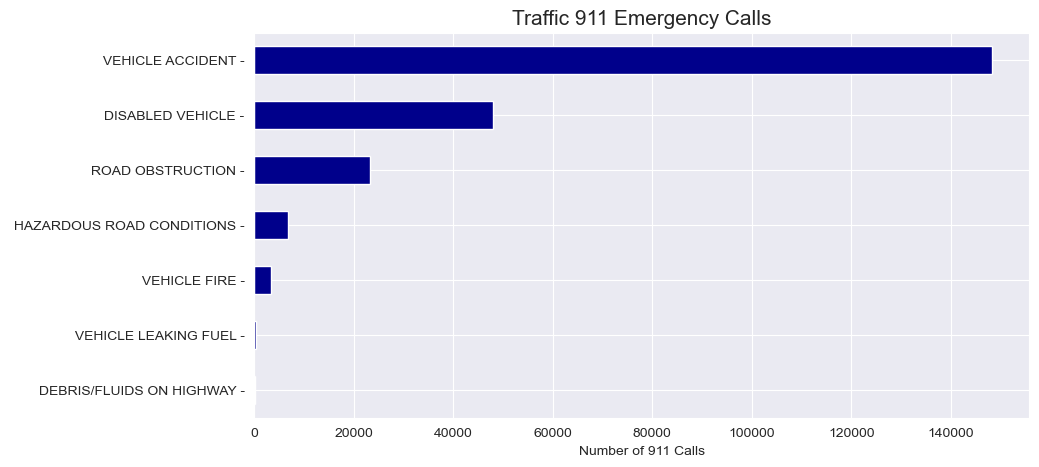

In [50]:
df[df['reason_cat']=='Traffic'].groupby('reason').count()['lat'].sort_values(ascending=True).plot(kind='barh', figsize=(10, 5), color='darkblue')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Traffic 911 Emergency Calls', fontsize=15)

**The most common traffic emergency titles are vehicle accident, disable vehicle and road obstruction.**

Text(0.5, 1.0, 'Fire 911 Emergency Calls')

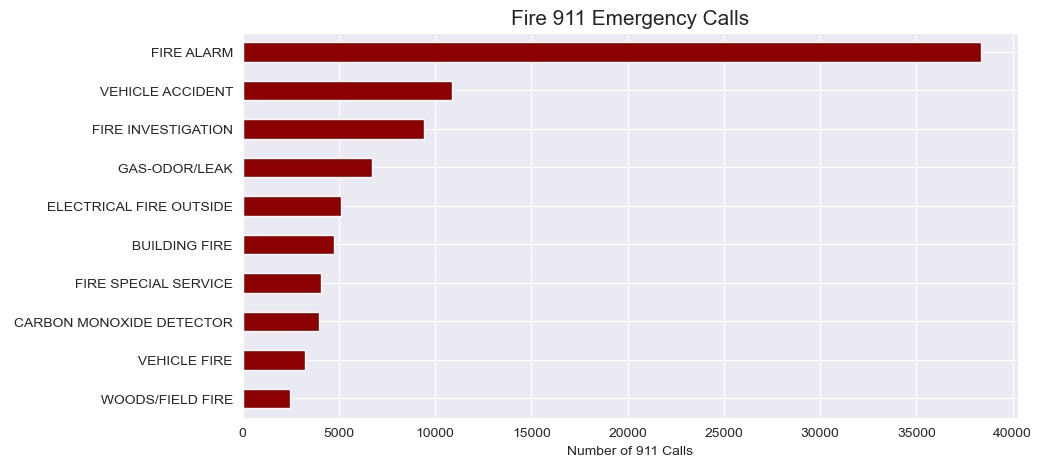

In [51]:
df[df['reason_cat']== 'Fire'].groupby('reason').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkred')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('Fire 911 Emergency Calls', fontsize=15)

**The most common fire emergency titles are fire alarm, vehicle accident and fire investigation**.

Text(0.5, 1.0, 'EMS 911 Emergency Calls')

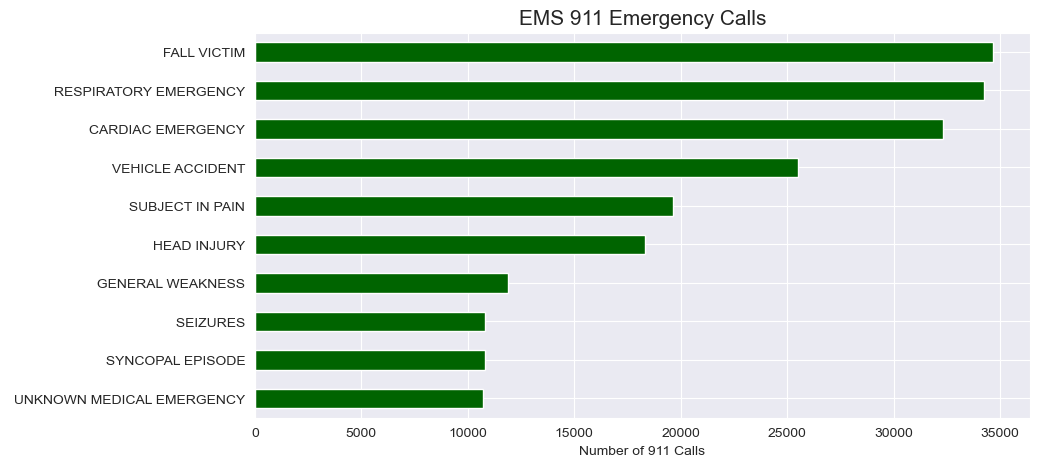

In [52]:
df[df['reason_cat']=='EMS'].groupby('reason').count()['lat'].sort_values(ascending=True).tail(10).plot(kind='barh', figsize=(10, 5), color='darkgreen')
plt.xlabel('Number of 911 Calls')
plt.ylabel('')
plt.title('EMS 911 Emergency Calls', fontsize=15)

**The most common EMS emergency titles are fall victim, respiratory emergency and cardiac emergency.**

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

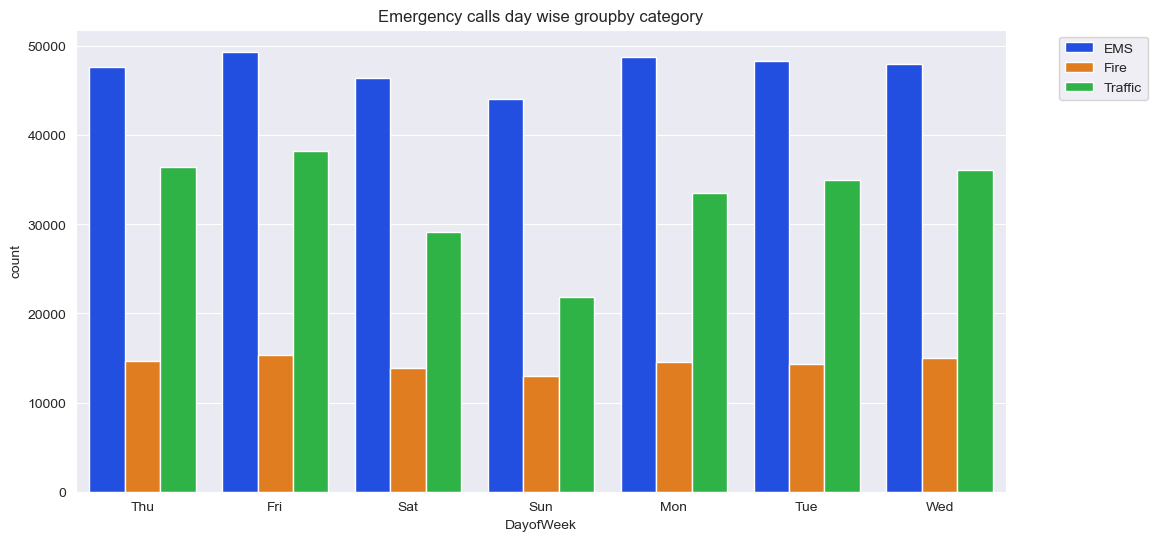

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['DayofWeek'],data=df,hue=df['reason_cat'],palette='bright')
plt.title("Emergency calls day wise groupby category")
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

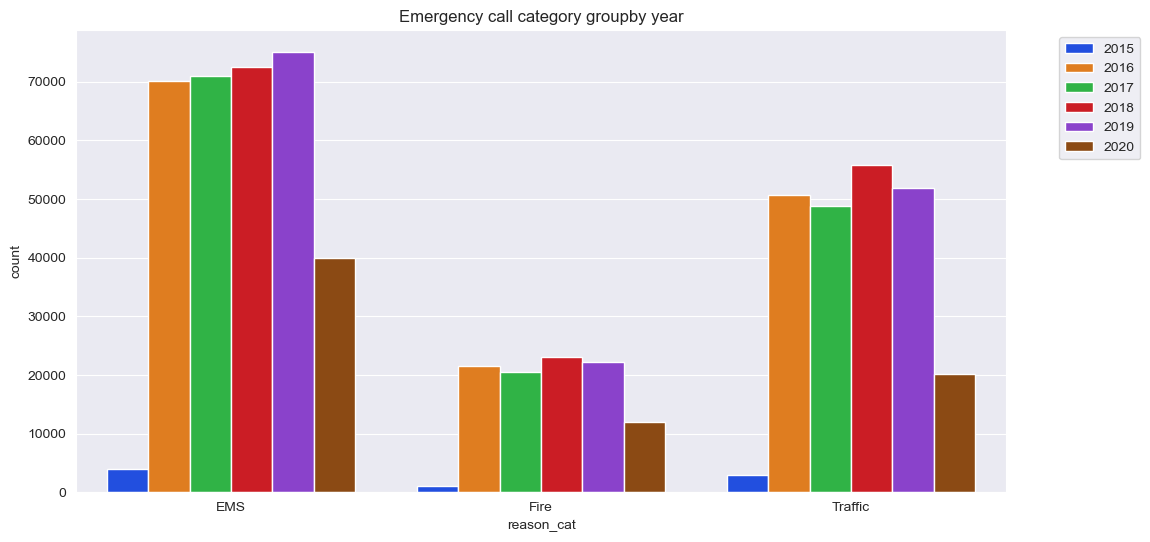

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['reason_cat'],data=df,hue=df['Year'],palette='bright')
plt.title("Emergency call category groupby year")
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

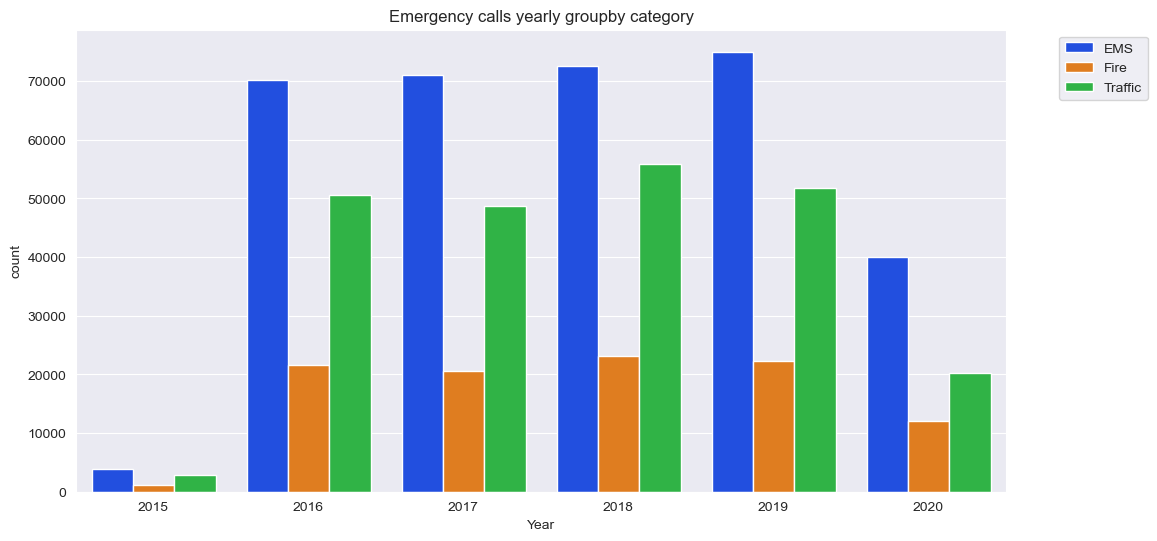

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Year'],data=df,hue=df['reason_cat'],palette='bright')
plt.title("Emergency calls yearly groupby category")
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

**Emergency calls are almost same throughout the year, except for year 2015 and 2020. Our dataset contains data for only one month of year 2015 and only four months of year 2020. So data is not available for complete year of 2015 and 2020.**

C:\Users\user\AppData\Local\Temp\ipykernel_2644\889819030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Hour'],data=df,palette='Set2')


Text(0.5, 1.0, 'Emergency call hour wise groupby category')

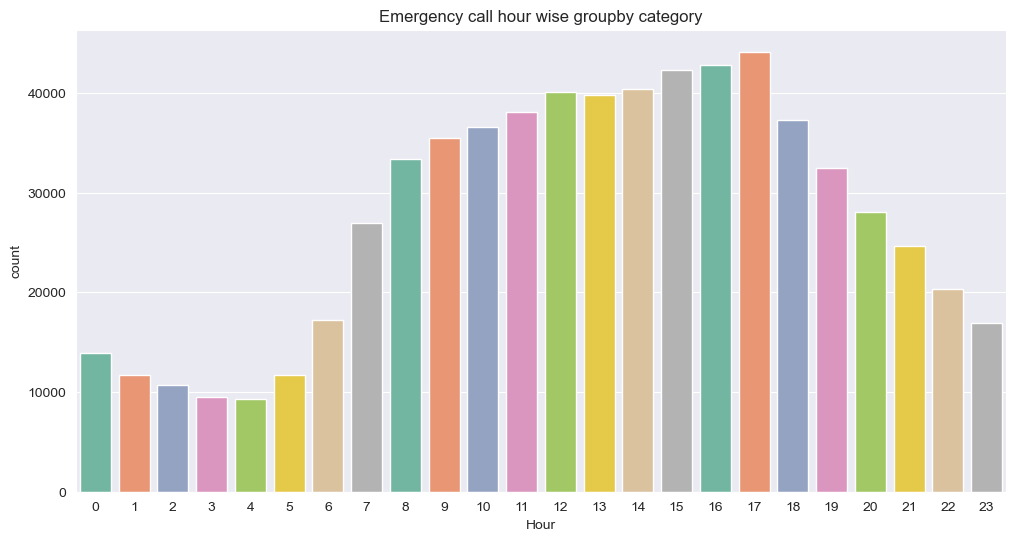

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Hour'],data=df,palette='Set2')
plt.title("Emergency call hour wise groupby category")

By seeing the above graph, we can observe that maximum number of emergency calls happend at round 5Pm. We need to find out why at this time only and what kind of emergency is required at this time.

Text(0.5, 1.0, 'Emergency call hour wise groupby category')

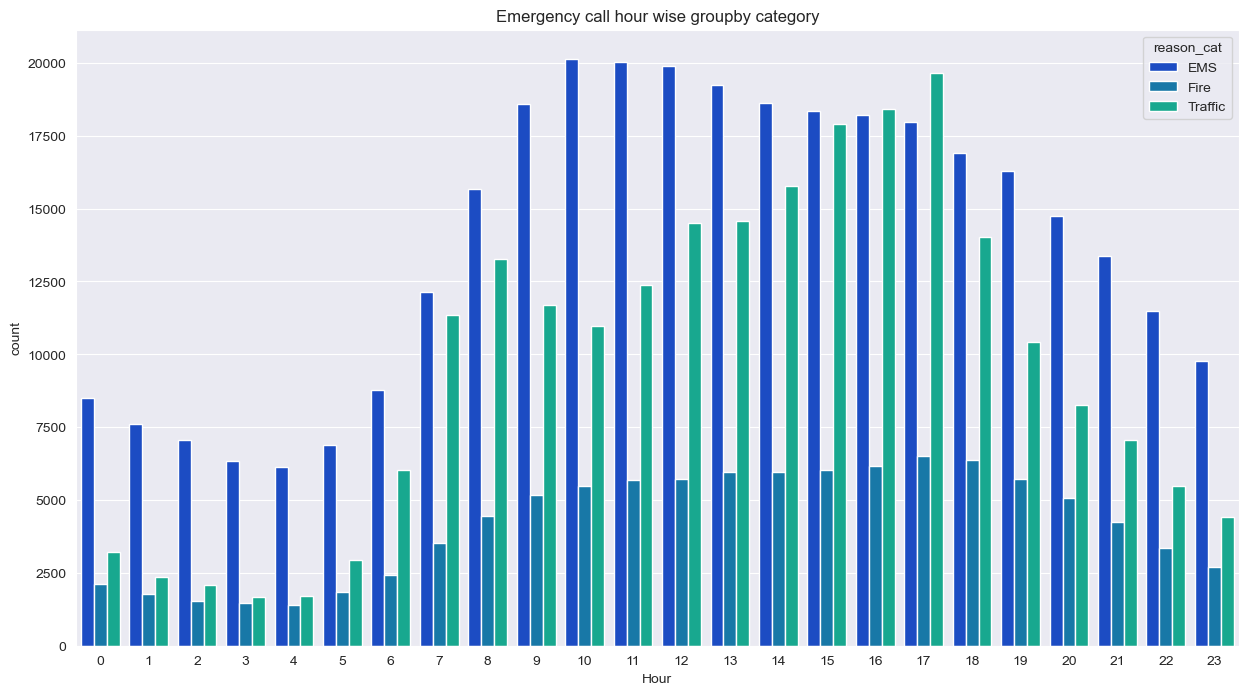

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['Hour'],data=df,hue=df['reason_cat'],palette='winter')
plt.title("Emergency call hour wise groupby category")
#plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

Now by seeing the above graph, it clear that people require maximum number of emergency service due to traffic related problem. This is may be due to people return home from their work place at this time and may find traffic jams, accidents due to signal jumping, rough driving etc

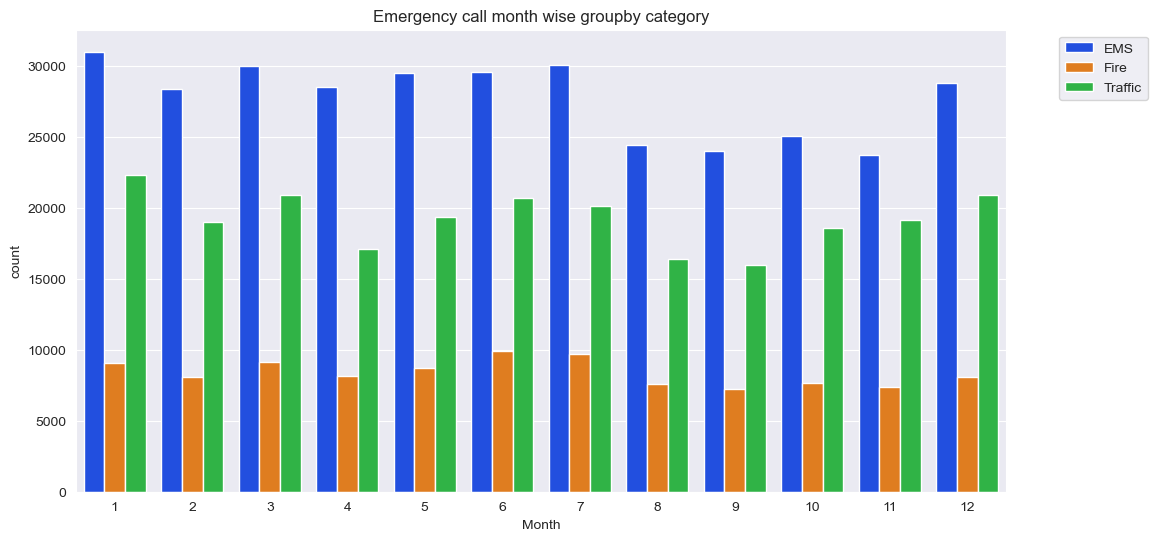

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Month'],data=df,hue=df['reason_cat'],palette='bright')
plt.title("Emergency call month wise groupby category")
plt.legend(loc=2, bbox_to_anchor=(1.05, 1))

** Did you notice something strange about the Plot? **

In [59]:
# It is missing some months! 9,10, and 11 are not there.

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [61]:
byMonth = df.groupby('Month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,DayofWeek,Year,Date,station_code,reason_cat,reason
Month,,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,40057,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,36421,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,39124,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,36617,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,38164,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034,39391,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832,39692,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359,32008,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213,31240,47213,47213


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

Text(0.5, 1.0, 'Count of calls per month')

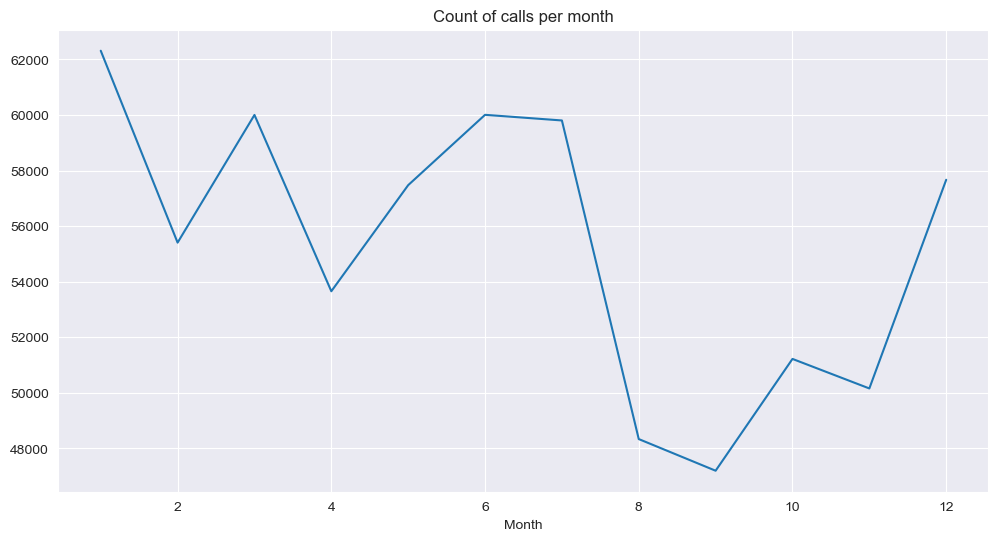

In [63]:
byMonth['twp'].plot(figsize=(12, 6))
plt.title('Count of calls per month')

**Maximum emergency service required in the months of Jan,Feb, March and Dec, broadly speaking in Winder season. As we already seen above that people require traffic related emergecy service and in winter due to bad weather, fog, less visibility this may cuase more.**

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column**

<Figure size 1200x800 with 0 Axes>

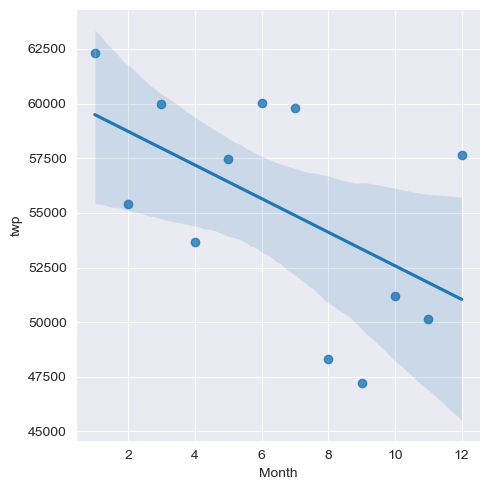

In [71]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

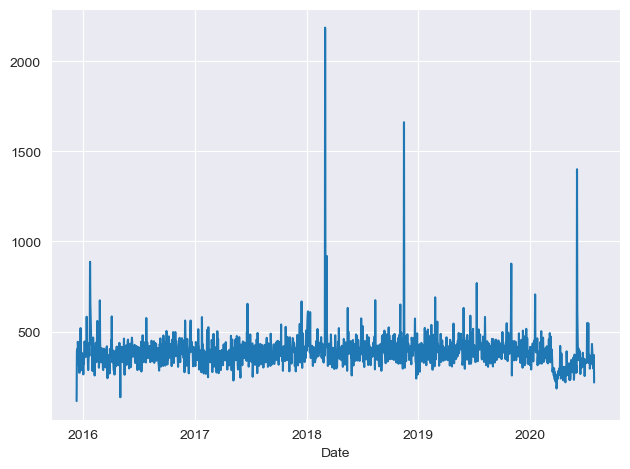

In [76]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

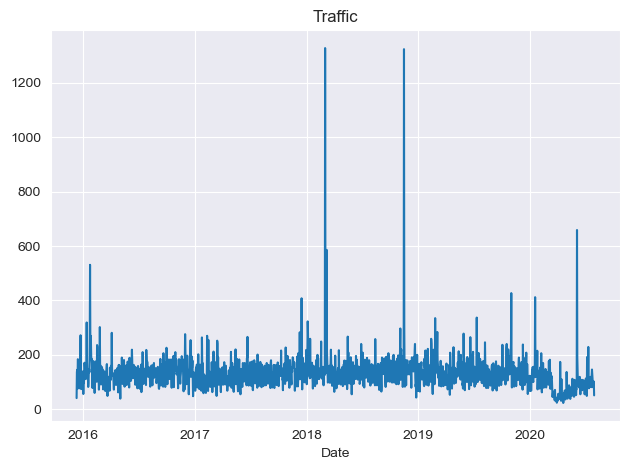

In [78]:
df[df['reason_cat']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

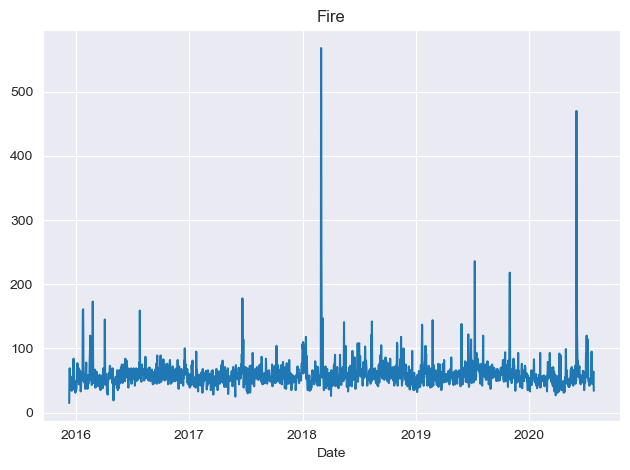

In [79]:
df[df['reason_cat']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

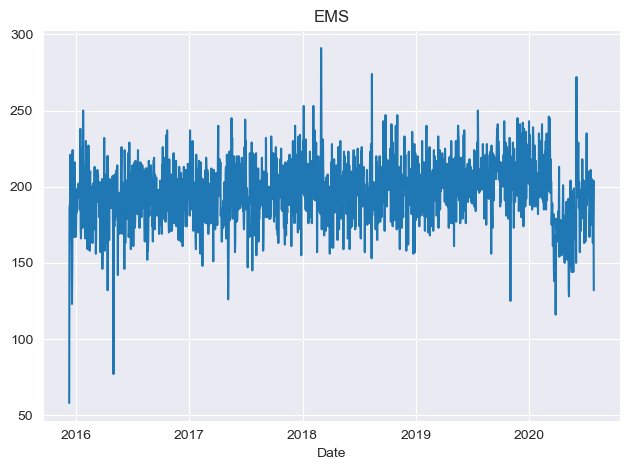

In [80]:
df[df['reason_cat']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [86]:
dayHour = df.groupby(['DayofWeek','Hour']).count()['twp'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1981,1632,1449,1296,1338,1638,2663,4138,5017,5288,...,6392,7038,7064,7112,5667,5055,4373,3912,3421,2828
Mon,1893,1567,1366,1271,1336,1843,2675,4428,5502,5722,...,5713,6289,6341,6407,5440,4488,3823,3252,2654,2069
Sat,2442,2058,1879,1588,1449,1579,1879,2488,3457,4312,...,5420,5181,5210,5211,4979,4748,4125,3893,3224,2961
Sun,2423,2132,1938,1614,1468,1487,1725,2404,3001,3728,...,4744,4475,4559,4505,4402,4133,3747,3158,2627,2321
Thu,1731,1407,1424,1234,1292,1774,2814,4431,5296,5411,...,6078,6493,6374,6933,5510,4701,4043,3490,2844,2351
Tue,1719,1455,1322,1212,1245,1741,2782,4425,5633,5562,...,5923,6251,6494,6877,5625,4618,3843,3408,2706,2133
Wed,1662,1481,1258,1262,1128,1609,2667,4643,5465,5443,...,6068,6532,6743,7061,5690,4684,4113,3530,2825,2204


<Axes: xlabel='Hour', ylabel='DayofWeek'>

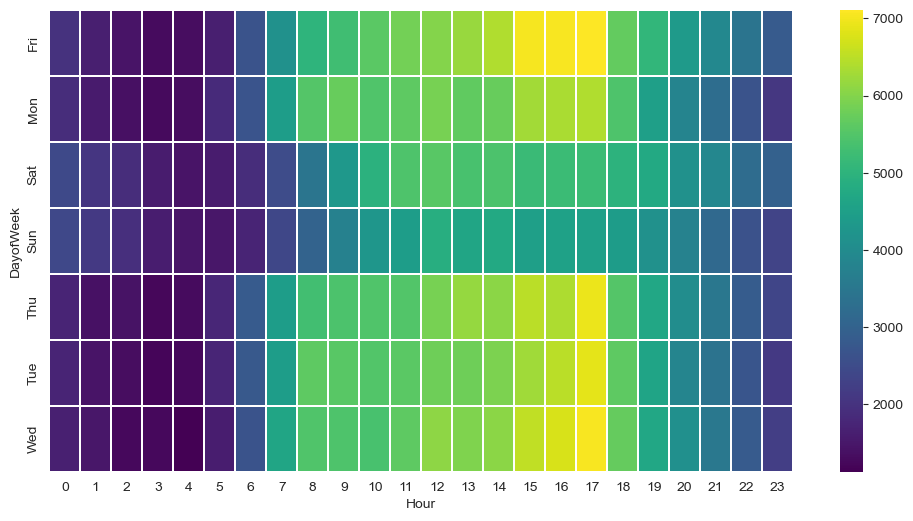

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis',linewidths=.1)

**Above tells that less emergency service required at night or early morning,while more at evening time and that is even more on Friday.**

**also from about 3 to 5pm exact on Friday there seem to be more cases**

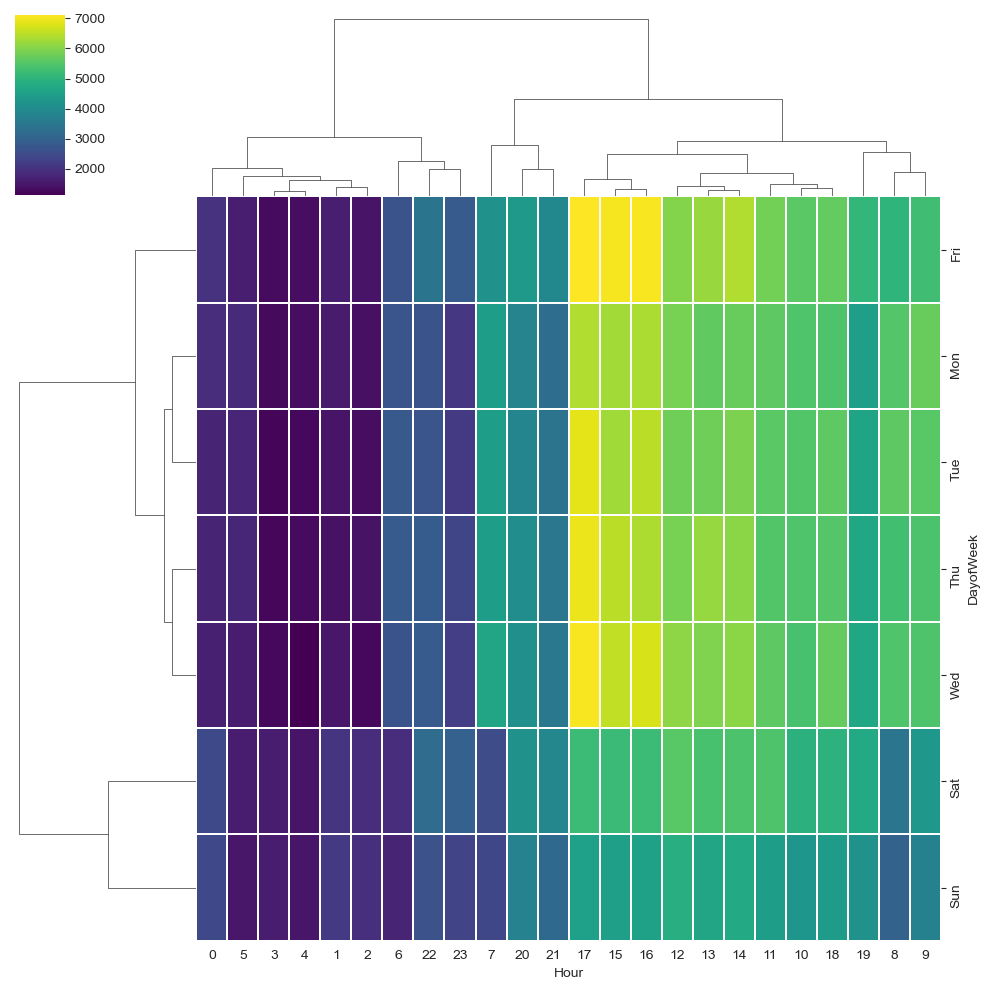

In [95]:
sns.clustermap(dayHour,cmap='viridis',linewidths=.1)

In [92]:
dayMonth = df.groupby(['DayofWeek','Month']).count()['twp'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayofWeek,,,,,,,,,,,,
Fri,9305,8251,10932,7995,8899,9202,8677,7332,7689,6931,8379,9303
Mon,8894,8743,8057,8407,7876,8510,9496,6853,6598,8068,6716,8489
Sat,8467,7589,8043,7511,7221,8195,7745,6108,6563,6607,6767,8588
Sun,7476,6450,6763,6862,6688,6832,7854,5272,5955,6315,5194,7162
Thu,9053,7995,8849,7721,8736,9486,8376,7502,6952,7482,8353,8147


<Axes: xlabel='Month', ylabel='DayofWeek'>

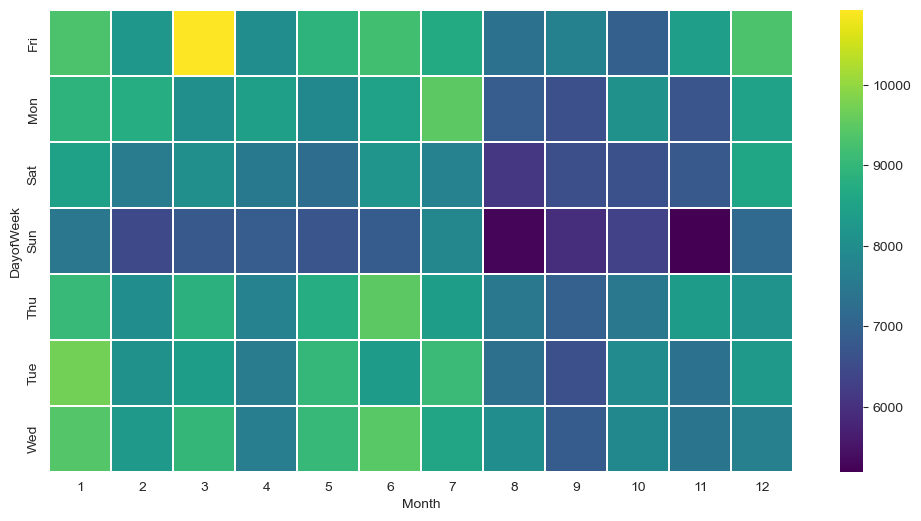

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis',linewidths=.1)

**People called for emergency services more on Friday's of March month**

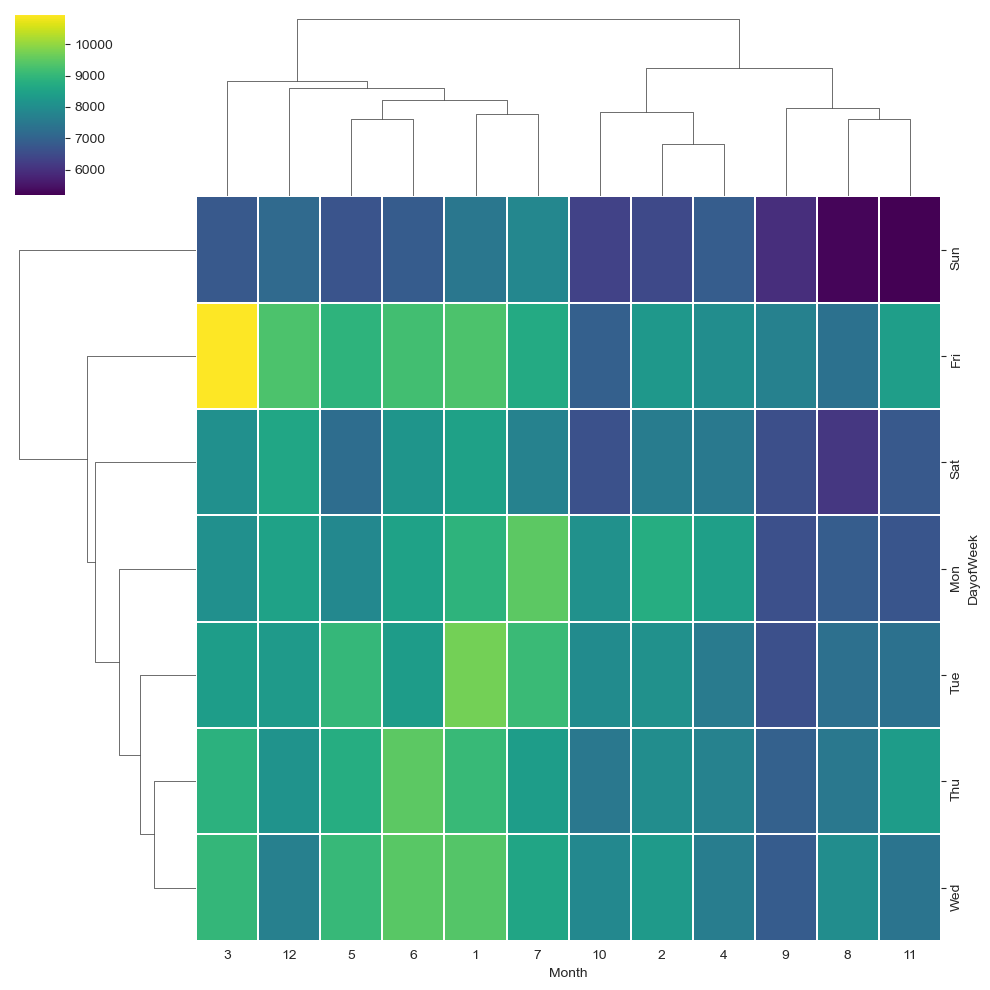

In [99]:
sns.clustermap(dayMonth,cmap='viridis',linewidths=.1)

In [100]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Hour,DayofWeek,Month,Year,Date,station_code,reason_cat,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,17,Thu,12,2015,2015-12-10,332,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,Thu,12,2015,2015-12-10,345,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,14,Thu,12,2015,2015-12-10,STA27,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,16,Thu,12,2015,2015-12-10,308A,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; Station 329; 2015-12-10 @ 16:56:52;,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,16,Thu,12,2015,2015-12-10,329,EMS,DIZZINESS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345; 2015-12-10 @ 15:39:04;,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,15,Thu,12,2015,2015-12-10,345,EMS,HEAD INJURY
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 352; 2015-12-10 @ 16:46:48;,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,16,Thu,12,2015,2015-12-10,352,EMS,NAUSEA/VOMITING
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Station 336; 2015-12-10 @ 16:17:05;,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,16,Thu,12,2015,2015-12-10,336,EMS,RESPIRATORY EMERGENCY
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD; Station 344; 2015-12-10 @ 16:51:42;,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,16,Thu,12,2015,2015-12-10,344,EMS,SYNCOPAL EPISODE
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYMOUTH; 2015-12-10 @ 17:35:41;,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,17,Thu,12,2015,2015-12-10,None,Traffic,VEHICLE ACCIDENT -


**So less emergency service required on Wednesday's of July month.
People called for emergency services more on Friday's of March month.**